In [ ]:
%load_ext autoreload
%autoreload 2

from google.colab import drive
drive.mount('/content/gdrive')
# %cd /content/gdrive/My Drive/Colab Notebooks/BCI
%cd /content/gdrive/My Drive/Colab Notebooks/BCI/data

%ls

In [ ]:
import mne
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Processing - All 3 sessions ** **bold text**

In [ ]:
# read in fif files
# Donald
idle_donald = mne.io.read_raw_fif("idle_Donald.fif", preload=True).pick("eeg")
nback_donald = mne.io.read_raw_fif("nback_Donald.fif", preload=True).pick("eeg")
driving_donald = mne.io.read_raw_fif("driving_Donald.fif", preload=True).pick("eeg")
driving_and_nback_donald = mne.io.read_raw_fif("driving_and_nback_Donald.fif", preload=True).pick("eeg")

# Ganavi
idle_ganavi = mne.io.read_raw_fif("idle_Ganavi.fif", preload=True).pick("eeg")
nback_ganavi = mne.io.read_raw_fif("nback_Ganavi.fif", preload=True).pick("eeg")
driving_ganavi = mne.io.read_raw_fif("driving_Ganavi.fif", preload=True).pick("eeg")
driving_and_nback_ganavi = mne.io.read_raw_fif("driving_and_nback_Ganavi.fif", preload=True).pick("eeg")

# Nicolas
idle_nicolas = mne.io.read_raw_fif("idle_Nicolas.fif", preload=True).pick("eeg")
nback_nicolas = mne.io.read_raw_fif("nback_Nicolas.fif", preload=True).pick("eeg")
driving_nicolas = mne.io.read_raw_fif("driving_Nicolas.fif", preload=True).pick("eeg")
driving_and_nback_nicolas = mne.io.read_raw_fif("driving_and_nback_Nicolas.fif", preload=True).pick("eeg")

# second recording session
# Donald
idle_donald2 = mne.io.read_raw_fif("idle_Donald2.fif", preload=True).pick("eeg")
nback_donald2 = mne.io.read_raw_fif("nback_Donald2.fif", preload=True).pick("eeg")
driving_donald2 = mne.io.read_raw_fif("driving_Donald2.fif", preload=True).pick("eeg")
driving_and_nback_donald2 = mne.io.read_raw_fif("driving_and_nback_Donald2.fif", preload=True).pick("eeg")

# Ganavi
idle_ganavi2 = mne.io.read_raw_fif("idle_Ganavi2.fif", preload=True).pick("eeg")
nback_ganavi2 = mne.io.read_raw_fif("nback_Ganavi2.fif", preload=True).pick("eeg")
driving_ganavi2 = mne.io.read_raw_fif("driving_Ganavi2.fif", preload=True).pick("eeg")
driving_and_nback_ganavi2 = mne.io.read_raw_fif("driving_and_nback_Ganavi2.fif", preload=True).pick("eeg")

# Nicolas
idle_nicolas2 = mne.io.read_raw_fif("idle_Nicolas2.fif", preload=True).pick("eeg")
nback_nicolas2 = mne.io.read_raw_fif("nback_Nicolas2.fif", preload=True).pick("eeg")
driving_nicolas2 = mne.io.read_raw_fif("driving_Nicolas2.fif", preload=True).pick("eeg")
driving_and_nback_nicolas2 = mne.io.read_raw_fif("driving_and_nback_Nicolas2.fif", preload=True).pick("eeg")

# third recording session
# Donald
idle_donald3 = mne.io.read_raw_fif("s3_idle_Doanld.fif", preload=True).pick("eeg")
nback_donald3 = mne.io.read_raw_fif("s3_nback_Doanld.fif", preload=True).pick("eeg")
driving_donald3 = mne.io.read_raw_fif("s3_driving_Doanld.fif", preload=True).pick("eeg")
driving_and_nback_donald3 = mne.io.read_raw_fif("s3_driving_and_nback_Doanld.fif", preload=True).pick("eeg")

# Ganavi
idle_ganavi3 = mne.io.read_raw_fif("s3_idle_Ganavi.fif", preload=True).pick("eeg")
nback_ganavi3 = mne.io.read_raw_fif("s3_nback_Ganavi.fif", preload=True).pick("eeg")
driving_ganavi3 = mne.io.read_raw_fif("s3_driving_Ganavi.fif", preload=True).pick("eeg")
driving_and_nback_ganavi3 = mne.io.read_raw_fif("s3_driving_and_nback_Ganavi.fif", preload=True).pick("eeg")

# Nicolas
idle_nicolas3 = mne.io.read_raw_fif("s3_idle-Nicolas.fif", preload=True).pick("eeg")
nback_nicolas3 = mne.io.read_raw_fif("s3_nback_Nicolas.fif", preload=True).pick("eeg")
driving_nicolas3 = mne.io.read_raw_fif("s3_driving_Nicolas.fif", preload=True).pick("eeg")
driving_and_nback_nicolas3 = mne.io.read_raw_fif("s3_driving_and_nback_Nicolas.fif", preload=True).pick("eeg")

In [ ]:
# crop recording files of Donald
# @@@ ATTENTION: THIS CHANGES THE RAW-OBJECT IN PLACE @@@

# inspect events of fif file
print(idle_donald.info["events"])
print(idle_donald.n_times)
# crop dataframe according to events (timesteps have to be converted into seconds)
idle_donald.crop(tmin=9529/250, tmax=84799/250)
# low pass filtering
idle_donald = idle_donald.filter(l_freq=None, h_freq=48., picks="all", method="fir",
                                 fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("idle_donald time in minutes: ", len(idle_donald)/250/60) 

# inspect events of fif file
print(nback_donald.info["events"])
print(nback_donald.n_times)
# crop dataframe according to events
nback_donald.crop(tmin=6839/250, tmax=82289/250)
# low pass filtering
nback_donald = nback_donald.filter(l_freq=None, h_freq=48., picks="all",
                                   method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("nback_donald time in minutes: ", len(nback_donald)/250/60) 

# inspect events of fif file
print(driving_donald.info["events"])
print(driving_donald.n_times)
# crop dataframe according to events
driving_donald.crop(tmin=265529/250, tmax=342809/250)
# low pass filtering
driving_donald = driving_donald.filter(l_freq=None, h_freq=48., picks="all",
                                       method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("driving_donald time in minutes: ", len(driving_donald)/250/60) 

# inspect fif file
print(driving_and_nback_donald.info["events"])
print(driving_and_nback_donald.n_times)
# crop dataframe according to events
driving_and_nback_donald.crop(tmin=4359/250, tmax=79689/250)
# low pass filtering
driving_and_nback_donald = driving_and_nback_donald.filter(l_freq=None, h_freq=48., picks="all",
                                                           method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("driving_and_nback_donald time in minutes: ", len(driving_and_nback_donald)/250/60)

# second recording session
# inspect events of fif file
print(idle_donald2.info["events"])
print(idle_donald2.n_times)
# crop dataframe according to events (timesteps have to be converted into seconds)
idle_donald2.crop(tmin=7359/250, tmax=82309/250)
# low pass filtering
idle_donald2 = idle_donald2.filter(l_freq=None, h_freq=48., picks="all",
                                   method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("idle_donald2 time in minutes: ", len(idle_donald2)/250/60) 

# inspect events of fif file
print(nback_donald2.info["events"])
print(nback_donald2.n_times)
# crop dataframe according to events
nback_donald2.crop(tmin=148989/250, tmax=224479/250)
# low pass filtering
nback_donald2 = nback_donald2.filter(l_freq=None, h_freq=48., picks="all",
                                     method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("nback_donald2 time in minutes: ", len(nback_donald2)/250/60) 

# @@@ second recording session @@@
# inspect events of fif file
print(driving_donald2.info["events"])
print(driving_donald2.n_times)
# crop dataframe according to events
driving_donald2.crop(tmin=17099/250, tmax=92739/250)
# low pass filtering
driving_donald2 = driving_donald2.filter(l_freq=None, h_freq=48., picks="all",
                                         method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("driving_donald2 time in minutes: ", len(driving_donald2)/250/60) 

# inspect fif file
print(driving_and_nback_donald2.info["events"])
print(driving_and_nback_donald2.n_times)
# crop dataframe according to events
driving_and_nback_donald2.crop(tmin=8199/250, tmax=84059/250)
# low pass filtering
driving_and_nback_donald2 = driving_and_nback_donald2.filter(l_freq=None, h_freq=48., picks="all",
                                                             method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("driving_and_nback_donald2 time in minutes: ", len(driving_and_nback_donald2)/250/60)

In [ ]:
# crop recording files of Ganavi
# @@@ ATTENTION: THIS CHANGES THE RAW-OBJECT IN PLACE @@@

# inspect events of fif file
print(idle_ganavi.info["events"])
print(idle_ganavi.n_times)
# crop dataframe according to events (timesteps have to be converted into seconds)
idle_ganavi.crop(tmin=9469/250, tmax=85559/250)
# low pass filtering
idle_ganavi = idle_ganavi.filter(l_freq=None, h_freq=48., picks="all",
                                 method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("idle_ganavi time in minutes: ", len(idle_ganavi)/250/60) 

# inspect events of fif file
print(nback_ganavi.info["events"])
print(nback_ganavi.n_times)
# crop dataframe according to events
nback_ganavi.crop(tmin=164019/250, tmax=240479/250)
# low pass filtering
nback_ganavi = nback_ganavi.filter(l_freq=None, h_freq=48., picks="all",
                                   method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("nback_ganavi time in minutes: ", len(nback_ganavi)/250/60) 

# inspect events of fif file
print(driving_ganavi.info["events"])
print(driving_ganavi.n_times)
# crop dataframe according to events
driving_ganavi.crop(tmin=11649/250, tmax=87879/250)
# low pass filtering
driving_ganavi = driving_ganavi.filter(l_freq=None, h_freq=48., picks="all",
                                       method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("driving_ganavi time in minutes: ", len(driving_ganavi)/250/60) 

# inspect fif file
print(driving_and_nback_ganavi.info["events"])
print(driving_and_nback_ganavi.n_times)
# crop dataframe according to events
driving_and_nback_ganavi.crop(tmin=15279/250, tmax=91899/250)
# low pass filtering
driving_and_nback_ganavi = driving_and_nback_ganavi.filter(l_freq=None, h_freq=48., picks="all",
                                                           method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("driving_ganavi time in minutes: ", len(driving_and_nback_ganavi)/250/60) 

# @@@ second recording session @@@
# inspect events of fif file
print(idle_ganavi2.info["events"])
print(idle_ganavi2.n_times)
# crop dataframe according to events (timesteps have to be converted into seconds)
idle_ganavi2.crop(tmin=1339/250, tmax=86969/250)
# low pass filtering
idle_ganavi2 = idle_ganavi2.filter(l_freq=None, h_freq=48., picks="all",
                                   method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("idle_ganavi2 time in minutes: ", len(idle_ganavi2)/250/60) 

# inspect events of fif file
print(nback_ganavi2.info["events"])
print(nback_ganavi2.n_times)
# crop dataframe according to events
nback_ganavi2.crop(tmin=155149/250, tmax=230459/250)
# low pass filtering
nback_ganavi2 = nback_ganavi2.filter(l_freq=None, h_freq=48., picks="all",
                                     method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("nback_ganavi2 time in minutes: ", len(nback_ganavi2)/250/60) 

# inspect events of fif file
print(driving_ganavi2.info["events"])
print(driving_ganavi2.n_times)
# crop dataframe according to events
driving_ganavi2.crop(tmin=27939/250, tmax=104439/250)
# low pass filtering
driving_ganavi2 = driving_ganavi2.filter(l_freq=None, h_freq=48., picks="all",
                                         method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("driving_ganavi2 time in minutes: ", len(driving_ganavi2)/250/60) 

# inspect fif file
print(driving_and_nback_ganavi2.info["events"])
print(driving_and_nback_ganavi2.n_times)
# crop dataframe according to events
driving_and_nback_ganavi2.crop(tmin=16189/250, tmax=92239/250)
# low pass filtering
driving_and_nback_ganavi2 = driving_and_nback_ganavi2.filter(l_freq=None, h_freq=48., picks="all",
                                                             method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("driving_ganavi2 time in minutes: ", len(driving_and_nback_ganavi2)/250/60)

In [ ]:
# crop recording files of Nicolas
# @@@ ATTENTION: THIS CHANGES THE RAW-OBJECT IN PLACE @@@

# inspect events of fif file
print(idle_nicolas.info["events"])
print(idle_nicolas.n_times)
# crop dataframe according to events (timesteps have to be converted into seconds)
idle_nicolas.crop(tmin=10259/250, tmax=86239/250)
# low pass filtering
idle_nicolas = idle_nicolas.filter(l_freq=None, h_freq=48., picks="all",
                                   method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("idle_nicolas time in minutes: ", len(idle_nicolas)/250/60) 

# inspect events of fif file
print(nback_nicolas.info["events"])
print(nback_nicolas.n_times)
# crop dataframe according to events
nback_nicolas.crop(tmin=234509/250, tmax=310599/250)
# low pass filtering
nback_nicolas = nback_nicolas.filter(l_freq=None, h_freq=48., picks="all",
                                     method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("nback_nicolas time in minutes: ", len(nback_nicolas)/250/60) 

# inspect events of fif file
print(driving_nicolas.info["events"])
print(driving_nicolas.n_times)
# crop dataframe according to events
driving_nicolas.crop(tmin=43759/250, tmax=119309/250)
# low pass filtering
driving_nicolas = driving_nicolas.filter(l_freq=None, h_freq=48., picks="all",
                                         method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("driving_nicolas time in minutes: ", len(driving_nicolas)/250/60) 

# inspect fif file
print(driving_and_nback_nicolas.info["events"])
print(driving_and_nback_nicolas.n_times)
# crop dataframe according to events
driving_and_nback_nicolas.crop(tmin=11269/250, tmax=87589/250)
# low pass filtering
driving_and_nback_nicolas = driving_and_nback_nicolas.filter(l_freq=None, h_freq=48., picks="all",
                                                             method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("driving_nicolas time in minutes: ", len(driving_and_nback_nicolas)/250/60) 

# @@@ second recording session @@@
# crop recording files of Nicolas
# @@@ ATTENTION: THIS CHANGES THE RAW-OBJECT IN PLACE @@@

# inspect events of fif file
print(idle_nicolas2.info["events"])
print(idle_nicolas2.n_times)
# crop dataframe according to events (timesteps have to be converted into seconds)
idle_nicolas2.crop(tmin=15229/250, tmax=90789/250)
# low pass filtering
idle_nicolas2 = idle_nicolas2.filter(l_freq=None, h_freq=48., picks="all",
                                     method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("idle_nicolas2 time in minutes: ", len(idle_nicolas2)/250/60) 

# inspect events of fif file
print(nback_nicolas2.info["events"])
print(nback_nicolas2.n_times)
# crop dataframe according to events
nback_nicolas2.crop(tmin=149699/250, tmax=225139/250)
# low pass filtering
nback_nicolas2 = nback_nicolas2.filter(l_freq=None, h_freq=48., picks="all",
                                       method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("nback_nicolas2 time in minutes: ", len(nback_nicolas2)/250/60) 

# inspect events of fif file
print(driving_nicolas2.info["events"])
print(driving_nicolas2.n_times)
# crop dataframe according to events
driving_nicolas2.crop(tmin=12049/250, tmax=87689/250)
# low pass filtering
driving_nicolas2 = driving_nicolas2.filter(l_freq=None, h_freq=48., picks="all",
                                           method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("driving_nicolas2 time in minutes: ", len(driving_nicolas2)/250/60) 

# inspect fif file
print(driving_and_nback_nicolas2.info["events"])
print(driving_and_nback_nicolas2.n_times)
# crop dataframe according to events
driving_and_nback_nicolas2.crop(tmin=28199/250, tmax=103879/250)
# low pass filtering
driving_and_nback_nicolas2 = driving_and_nback_nicolas2.filter(l_freq=None, h_freq=48., picks="all",
                                                               method="fir", fir_window="hamming", fir_design='firwin')
# we want 5m of recording time
print("driving_nicolas2 time in minutes: ", len(driving_and_nback_nicolas2)/250/60) 

In [ ]:
# remove outliers & standardize data

channel_names = idle_donald.ch_names

scenarios_dict_s1 = {
    "idle": [idle_donald.get_data(), idle_ganavi.get_data(), idle_nicolas.get_data()],
    "nback": [nback_donald.get_data(), nback_ganavi.get_data(), nback_nicolas.get_data()],
    "driving": [driving_donald.get_data(), driving_ganavi.get_data(), driving_nicolas.get_data()],
    "driving_and_nback": [driving_and_nback_donald.get_data(), driving_and_nback_ganavi.get_data(), driving_and_nback_nicolas.get_data()]
}

scenarios_dict_s2 = {
    "idle": [idle_donald2.get_data(), idle_ganavi2.get_data(), idle_nicolas2.get_data()],
    "nback": [nback_donald2.get_data(), nback_ganavi2.get_data(), nback_nicolas2.get_data()],
    "driving": [driving_donald2.get_data(), driving_ganavi2.get_data(), driving_nicolas2.get_data()],
    "driving_and_nback": [driving_and_nback_donald2.get_data(), driving_and_nback_ganavi2.get_data(), driving_and_nback_nicolas2.get_data()]
}

def standardize_data(scenarios_dict):
    standardized_scenarios_dict = {}
    # remove outliers by trimming off 5th and 95th 
    for scenario, scenario_data in scenarios_dict.items():
        pp_scenario_data = []
        for subject_data in scenario_data:
            pp_subject_data = []
            for channel in subject_data:
                p5, p95 = np.percentile(channel, [5,95])
                # replace extreme values with the appropriate percentiles
                channel[channel < p5] = p5
                channel[channel > p95] = p95
                # standardize data
                channel = (channel - channel.mean())/channel.std()
                pp_subject_data.append(channel)
            pp_scenario_data.append(pp_subject_data)
        standardized_scenarios_dict.update({scenario:pp_scenario_data})
    return standardized_scenarios_dict

standardized_scenarios_dict_s1 = standardize_data(scenarios_dict_s1)
standardized_scenarios_dict_s2 = standardize_data(scenarios_dict_s2)

In [ ]:
# merge individual subject datasets into one common scenario dataset and apply low pass filter at 48 Hz

def merge_data(data):
    scenarios_mne_dict = {}
    info = mne.create_info(ch_names=channel_names,
                          ch_types=['eeg'] * len(channel_names),
                          sfreq=250)

    for scenario_name, scenario_data in data.items():
        data = np.concatenate(tuple(scenario_data), axis=1)
        scenario_raw = mne.io.RawArray(data, info)
        scenarios_mne_dict.update({scenario_name:scenario_raw})

    # each scenario should be 3x5m = 15m
    print("idle time in minutes: ", len(scenarios_mne_dict["idle"])/250/60) 
    print("nback time in minutes: ", len(scenarios_mne_dict["nback"])/250/60) 
    print("driving time in minutes: ", len(scenarios_mne_dict["driving"])/250/60) 
    print("driving_and_nback time in minutes: ", len(scenarios_mne_dict["driving_and_nback"])/250/60) 

    return scenarios_mne_dict

scenarios_mne_dict_s1 = merge_data(standardized_scenarios_dict_s1)
scenarios_mne_dict_s2 = merge_data(standardized_scenarios_dict_s1)

In [ ]:
# compute the psd of each single frequency across the entire time series data segmented
# in 1s windows with a 50% overlap

def compute_psd(data):
    scenarios_psd_dict = {}
    for scenario_name, scenario_data in data.items():
      scenario_psd, _ = mne.time_frequency.psd_welch(scenario_data, fmin=0, fmax=50, tmin=None, tmax=None,
                                                      n_fft=250, n_overlap=125, n_per_seg=250, picks=None,
                                                      proj=False, n_jobs=1, reject_by_annotation=True, average=None,
                                                      window='blackman', verbose=True)
      scenarios_psd_dict.update({scenario_name:scenario_psd})
      # pspds is of dim (8, 51, 639), i.e. (channels, frequencies, time segments)
      print(scenario_name+" shape: ", scenario_psd.shape)
    return scenarios_psd_dict
  
scenarios_psd_dict_s1 = compute_psd(scenarios_mne_dict_s1)
scenarios_psd_dict_s2 = compute_psd(scenarios_mne_dict_s2)

In [ ]:
# extract features from psds
# ASSUMPTION #
# we take the average of the different frequencies defined in the ranges of δ (<4 Hz), θ (4–7 Hz),
# α (8–12 Hz), β (12–30 Hz), and γ (31–50 Hz) to get a single representative value

def extract_features(psds):
    delta = psds[:,0:4,:]
    theta = psds[:,4:8,:]
    alpha = psds[:,8:13,:]
    beta = psds[:,12:31,:]
    gamma = psds[:,31:51,:]

    delta_mean = np.mean(delta, axis=1)
    theta_mean = np.mean(theta, axis=1)
    alpha_mean = np.mean(alpha, axis=1)
    beta_mean = np.mean(beta, axis=1)
    gamma_mean = np.mean(gamma, axis=1)

    # replace extreme value with the 5th and 95th percentile respectively
    absolute_features = [delta_mean, theta_mean, alpha_mean, beta_mean, gamma_mean]
    for feature in absolute_features:
        p5s, p95s = np.percentile(feature, [5,95], axis=1)
        for channel, (p5, p95) in enumerate(zip(p5s,p95s)):
          feature[channel, feature[channel] < p5] = p5
          feature[channel, feature[channel] > p95] = p95

    # calculate some ratios given in the paper: 
    # Barua, Shaibal, Mobyen Uddin Ahmed, and Shahina Begum. "Towards intelligent data analytics: 
    # A case study in driver cognitive load classification." Brain sciences 10.8 (2020): 526.

    r1 = (alpha_mean + theta_mean)/beta_mean
    r2 = alpha_mean/beta_mean
    r3 = (alpha_mean + theta_mean)/(alpha_mean + beta_mean)
    r4 = theta_mean/beta_mean

    columns = {
        "Fz_delta": delta_mean[0,:],
        "Fz_theta": theta_mean[0,:],
        "Fz_alpha": alpha_mean[0,:],
        "Fz_beta": beta_mean[0,:],
        "Fz_gamma": gamma_mean[0,:],
        "Fz_r1": r1[0,:],
        "Fz_r2": r2[0,:],
        "Fz_r3": r3[0,:],
        "Fz_r4": r4[0,:],

        "C3_delta": delta_mean[1,:],
        "C3_theta": theta_mean[1,:],
        "C3_alpha": alpha_mean[1,:],
        "C3_beta": beta_mean[1,:],
        "C3_gamma": gamma_mean[1,:],
        "C3_r1": r1[1,:],
        "C3_r2": r2[1,:],
        "C3_r3": r3[1,:],
        "C3_r4": r4[1,:],

        "Cz_delta": delta_mean[2,:],
        "Cz_theta": theta_mean[2,:],
        "Cz_alpha": alpha_mean[2,:],
        "Cz_beta": beta_mean[2,:],
        "Cz_gamma": gamma_mean[2,:],
        "Cz_r1": r1[2,:],
        "Cz_r2": r2[2,:],
        "Cz_r3": r3[2,:],
        "Cz_r4": r4[2,:],

        "C4_delta": delta_mean[3,:],
        "C4_theta": theta_mean[3,:],
        "C4_alpha": alpha_mean[3,:],
        "C4_beta": beta_mean[3,:],
        "C4_gamma": gamma_mean[3,:],
        "C4_r1": r1[3,:],
        "C4_r2": r2[3,:],
        "C4_r3": r3[3,:],
        "C4_r4": r4[3,:],

        "Pz_delta": delta_mean[4,:],
        "Pz_theta": theta_mean[4,:],
        "Pz_alpha": alpha_mean[4,:],
        "Pz_beta": beta_mean[4,:],
        "Pz_gamma": gamma_mean[4,:],
        "Pz_r1": r1[4,:],
        "Pz_r2": r2[4,:],
        "Pz_r3": r3[4,:],
        "Pz_r4": r4[4,:],

        "P07_delta": delta_mean[5,:],
        "P07_theta": theta_mean[5,:],
        "P07_alpha": alpha_mean[5,:],
        "P07_beta": beta_mean[5,:],
        "P07_gamma": gamma_mean[5,:],
        "P07_r1": r1[5,:],
        "P07_r2": r2[5,:],
        "P07_r3": r3[5,:],
        "P07_r4": r4[5,:],

        "Oz_delta": delta_mean[6,:],
        "Oz_theta": theta_mean[6,:],
        "Oz_alpha": alpha_mean[6,:],
        "Oz_beta": beta_mean[6,:],
        "Oz_gamma": gamma_mean[6,:],
        "Oz_r1": r1[6,:],
        "Oz_r2": r2[6,:],
        "Oz_r3": r3[6,:],
        "Oz_r4": r4[6,:],

        "P08_delta": delta_mean[7,:],
        "P08_theta": theta_mean[7,:],
        "P08_alpha": alpha_mean[7,:],
        "P08_beta": beta_mean[7,:],
        "P08_gamma": gamma_mean[7,:],
        "P08_r1": r1[7,:],
        "P08_r2": r2[7,:],
        "P08_r3": r3[7,:],
        "P08_r4": r4[7,:]
    }

    #for key, value in columns.items():
    #  print(key, value.shape)

    return columns

def remove_nan(data_dict):
    scenario_features_dict = {}
    for scenario_name, scenario_psds in data_dict.items():
      data = extract_features(scenario_psds)
      for key, value in data.items():
        if np.isnan(value).any():
          np.nan_to_num(value, copy=False, nan=0.0)
      scenario_features_dict.update({scenario_name:data})
    return scenario_features_dict

scenario_features_dict_s1 = remove_nan(scenarios_psd_dict_s1)
scenario_features_dict_s2 = remove_nan(scenarios_psd_dict_s2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
# gather data for each feature across all scenarios and trim datasets to get rid of extreme outliers

features = scenario_features_dict_s1["idle"].keys()
print(features)
feature_scenarios_dict = {}
for feature in features:
    scenarios_data = []
    for scenario in scenario_features_dict_s1.values():
      data = scenario[feature]
      scenarios_data.append(data)
    feature_scenarios_dict.update({feature:scenarios_data})

for feature, data in feature_scenarios_dict.items():
    data_shape = []
    contains_null = []
    for index, el in enumerate(data):
        data_shape.append(el.shape)
        if np.isnan(el).any() == True:
          data[index] = np.nan_to_num(el, copy=True, nan=0.0)
          feature_scenarios_dict.update({feature:data})
          contains_null.append(True)
        else: contains_null.append(False)
    print(feature, "shape across scenarios:", data_shape, "NaNs present:", contains_null)

print("number of features:", len(features))
delta_names = [key for key in features if "delta" in key]
alpha_names = [key for key in features if "alpha" in key]
beta_names = [key for key in features if "beta" in key]
theta_names = [key for key in features if "theta" in key]
gamma_names = [key for key in features if "gamma" in key]
r1_names = [key for key in features if "r1" in key]
r2_names = [key for key in features if "r2" in key]
r3_names = [key for key in features if "r3" in key]
r4_names = [key for key in features if "r4" in key]

dict_keys(['Fz_delta', 'Fz_theta', 'Fz_alpha', 'Fz_beta', 'Fz_gamma', 'Fz_r1', 'Fz_r2', 'Fz_r3', 'Fz_r4', 'C3_delta', 'C3_theta', 'C3_alpha', 'C3_beta', 'C3_gamma', 'C3_r1', 'C3_r2', 'C3_r3', 'C3_r4', 'Cz_delta', 'Cz_theta', 'Cz_alpha', 'Cz_beta', 'Cz_gamma', 'Cz_r1', 'Cz_r2', 'Cz_r3', 'Cz_r4', 'C4_delta', 'C4_theta', 'C4_alpha', 'C4_beta', 'C4_gamma', 'C4_r1', 'C4_r2', 'C4_r3', 'C4_r4', 'Pz_delta', 'Pz_theta', 'Pz_alpha', 'Pz_beta', 'Pz_gamma', 'Pz_r1', 'Pz_r2', 'Pz_r3', 'Pz_r4', 'P07_delta', 'P07_theta', 'P07_alpha', 'P07_beta', 'P07_gamma', 'P07_r1', 'P07_r2', 'P07_r3', 'P07_r4', 'Oz_delta', 'Oz_theta', 'Oz_alpha', 'Oz_beta', 'Oz_gamma', 'Oz_r1', 'Oz_r2', 'Oz_r3', 'Oz_r4', 'P08_delta', 'P08_theta', 'P08_alpha', 'P08_beta', 'P08_gamma', 'P08_r1', 'P08_r2', 'P08_r3', 'P08_r4'])
Fz_delta shape across scenarios: [(1817,), (1823,), (1831,), (1825,)] NaNs present: [False, False, False, False]
Fz_theta shape across scenarios: [(1817,), (1823,), (1831,), (1825,)] NaNs present: [False, False

In [ ]:
# construct datasets of first recording session
idle_s1_df = pd.DataFrame(data=scenario_features_dict_s1["idle"])
nback_s1_df = pd.DataFrame(data=scenario_features_dict_s1["nback"])
driving_s1_df = pd.DataFrame(data=scenario_features_dict_s1["driving"])
driving_and_nback_s1_df = pd.DataFrame(data=scenario_features_dict_s1["driving_and_nback"])

# binary setting
X_binary_train = pd.concat([driving_s1_df, driving_and_nback_s1_df])
print("X_binary_train.shape: ", X_binary_train.shape)

driving_labels_binary_s1 = np.zeros(len(driving_s1_df), dtype=np.int8)
driving_and_nback_labels_binary_s1 = np.ones(len(driving_and_nback_s1_df), dtype=np.int8)
y_binary_train = np.concatenate((driving_labels_binary_s1, driving_and_nback_labels_binary_s1),
                                axis=0,
                                dtype=np.int8)
print("y_binary_train.shape:", y_binary_train.shape)


X_binary_train.shape:  (3656, 72)
y_binary_train.shape: (3656,)


In [ ]:
# construct datasets of second recording session
idle_s2_df = pd.DataFrame(data=scenario_features_dict_s2["idle"])
nback_s2_df = pd.DataFrame(data=scenario_features_dict_s2["nback"])
driving_s2_df = pd.DataFrame(data=scenario_features_dict_s2["driving"])
driving_and_nback_s2_df = pd.DataFrame(data=scenario_features_dict_s2["driving_and_nback"])

# binary setting
X_binary_test = pd.concat([driving_s2_df, driving_and_nback_s2_df])
print("X_binary_test.shape: ", X_binary_test.shape)

driving_labels_binary_s2 = np.zeros(len(driving_s2_df), dtype=np.int8)
driving_and_nback_labels_binary_s2 = np.ones(len(driving_and_nback_s2_df), dtype=np.int8)

y_binary_test = np.concatenate((driving_labels_binary_s2, driving_and_nback_labels_binary_s2),
                                axis=0,
                                dtype=np.int8)
print("y_binary_test.shape:", y_binary_test.shape)


X_binary_test.shape:  (3656, 72)
y_binary_test.shape: (3656,)


In [ ]:
# construct datasets of second recording session
idle_s2_df = pd.DataFrame(data=scenario_features_dict_s2["idle"])
nback_s2_df = pd.DataFrame(data=scenario_features_dict_s2["nback"])
driving_s2_df = pd.DataFrame(data=scenario_features_dict_s2["driving"])
driving_and_nback_s2_df = pd.DataFrame(data=scenario_features_dict_s2["driving_and_nback"])

# binary setting
X_binary_test = pd.concat([driving_s2_df, driving_and_nback_s2_df])
print("X_binary_test.shape: ", X_binary_test.shape)

driving_labels_binary_s2 = np.zeros(len(driving_s2_df), dtype=np.int8)
driving_and_nback_labels_binary_s2 = np.ones(len(driving_and_nback_s2_df), dtype=np.int8)

y_binary_test = np.concatenate((driving_labels_binary_s2, driving_and_nback_labels_binary_s2),
                                axis=0,
                                dtype=np.int8)
print("y_binary_test.shape:", y_binary_test.shape)


X_binary_test.shape:  (3656, 72)
y_binary_test.shape: (3656,)


In [ ]:
df_1 = X_binary_train.copy(deep= True)
df_1['label'] = y_binary_train
df_2 = X_binary_test.copy(deep=True)
df_2['label'] = y_binary_test
df = pd.concat([df_1, df_2], axis=0)
df = shuffle(df)

In [ ]:
y = df['label']
X = df.drop(labels=['label'], axis =1)

In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# **Classification - RF and KNN**

In [ ]:
#classification using RF
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=0)
clf.fit(shuffle(X_train), shuffle(y_train))
y_pred_RF = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrixRF = confusion_matrix(y_test, y_pred_RF)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_RF).ravel()
specificity = tn / (tn+fp)
print(specificity)
sensitivity = (tp)/(tp + fn)
print(sensitivity)

0.49722222222222223
0.5491251682368775


In [ ]:
tn, fp, fn, tp

(452, 268, 550, 193)

In [ ]:
confusion_matrixRF

array([[364, 386],
       [162, 551]])

In [ ]:
#Calculating Model Accuracy
accuracyRF = accuracy_score(y_test, y_pred_RF)*100
print('Accuracy of the model:' + str(round(accuracyRF, 2)) + ' %.')

Accuracy of the model:62.54 %.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(X_train, y_train)
y_pred_KNN = classifier.predict(X_test)

In [ ]:
y_pred_KNN

array([0, 0, 1, ..., 0, 0, 0], dtype=int8)

In [ ]:
confusion_matrixKNN = confusion_matrix(y_test, y_pred_KNN)
confusion_matrixKNN

array([[506, 244],
       [268, 445]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_KNN).ravel()
specificity = tn / (tn+fp)
print(specificity)
sensitivity = (tp)/(tp + fn)
print(sensitivity)

0.6746666666666666
0.6241234221598878


In [ ]:
tn, fp, fn, tp

(506, 244, 268, 445)

In [ ]:
#Calculating Model Accuracy
accuracyKNN = accuracy_score(y_test, y_pred_KNN)*100
print('Accuracy of the model:' + str(round(accuracyKNN, 2)) + ' %.')

Accuracy of the model:65.0 %.


## **Neural Networks/ MLP Models**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD

In [ ]:
import tensorflow as tf

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [ ]:
model_a = Sequential() 
model_a.add(Dense(64, activation='relu', input_dim=72))
model_a.add(Dense(64, activation='relu'))
model_a.add(Dense(32, activation='relu'))
model_a.add(Dense(32, activation='relu'))
model_a.add(Dense(1, activation='sigmoid'))
model_a.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4672      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,001
Trainable params: 12,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist_a = model_a.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=128, callbacks=[callback])

Epoch 1/100
46/46 [==============================] - 1s 5ms/step - loss: 0.6949 - accuracy: 0.5421 - val_loss: 0.6620 - val_accuracy: 0.5988
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.5878 - val_loss: 0.6475 - val_accuracy: 0.6364
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.6023 - val_loss: 0.6404 - val_accuracy: 0.6364
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6134 - val_loss: 0.6351 - val_accuracy: 0.6282
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.6225 - val_loss: 0.6215 - val_accuracy: 0.6302
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.6345 - val_loss: 0.6062 - val_accuracy: 0.6576
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.6466 - val_loss: 0.5996 - val_accuracy: 0.6562
Epoch 8/100
4

[]

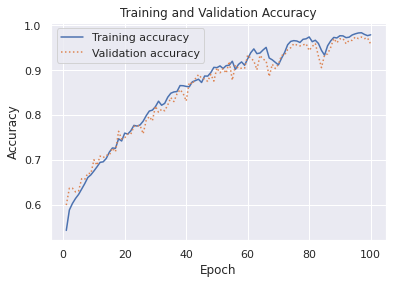

In [ ]:
sns.set()
acc = hist_a.history['accuracy']
val = hist_a.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.plot()

In [ ]:
model_a.evaluate(X_test, y_test)

46/46 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.8975


[0.49644920229911804, 0.8974709510803223]

[]

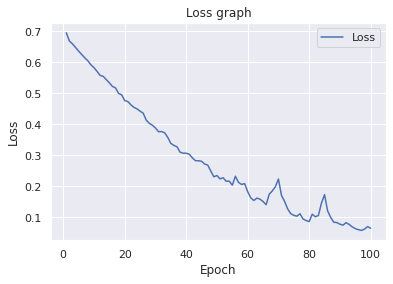

In [ ]:
loss = hist_a.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, '-', label='Loss')
plt.title('Loss graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.plot()

In [ ]:
model_a.save("BestModelYet")

# **MLP with/without Early Stopping**

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=72))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                4672      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,001
Trainable params: 12,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=128)

Epoch 1/100
46/46 [==============================] - 1s 5ms/step - loss: 0.7162 - accuracy: 0.5345 - val_loss: 0.6713 - val_accuracy: 0.5632
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5712 - val_loss: 0.6624 - val_accuracy: 0.5947
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.5693 - val_loss: 0.6585 - val_accuracy: 0.5769
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.5933 - val_loss: 0.6461 - val_accuracy: 0.6056
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.5991 - val_loss: 0.6368 - val_accuracy: 0.6145
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.6015 - val_loss: 0.6320 - val_accuracy: 0.6241
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.6196 - val_loss: 0.6293 - val_accuracy: 0.6282
Epoch 8/100
4

[]

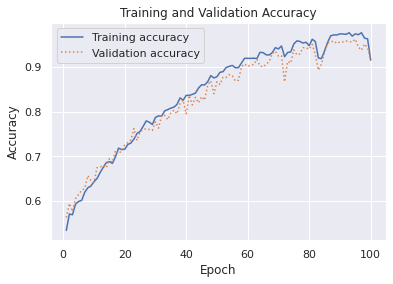

In [ ]:
sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.plot()

In [ ]:
model.save("Model1")

In [ ]:
model.evaluate(X_test, y_test)

46/46 [==============================] - 0s 910us/step - loss: 0.5244 - accuracy: 0.8476


[0.5244479179382324, 0.847573459148407]

[]

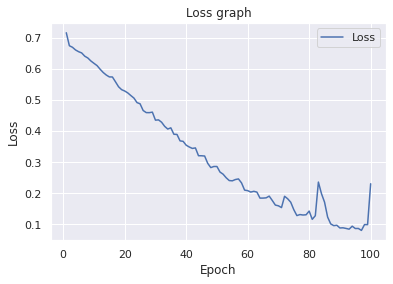

In [ ]:
loss = hist.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, '-', label='Loss')
plt.title('Loss graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.plot()

In [ ]:
hist_es = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=128, callbacks=[callback] )

Epoch 1/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1459 - accuracy: 0.9438 - val_loss: 0.1932 - val_accuracy: 0.9453
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0985 - accuracy: 0.9663 - val_loss: 0.1909 - val_accuracy: 0.9481
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9672 - val_loss: 0.2113 - val_accuracy: 0.9357
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.9583 - val_loss: 0.1913 - val_accuracy: 0.9542
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0964 - accuracy: 0.9646 - val_loss: 0.1607 - val_accuracy: 0.9624
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9786 - val_loss: 0.1689 - val_accuracy: 0.9638
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9820 - val_loss: 0.1501 - val_accuracy: 0.9686
Epoch 8/100
4

[]

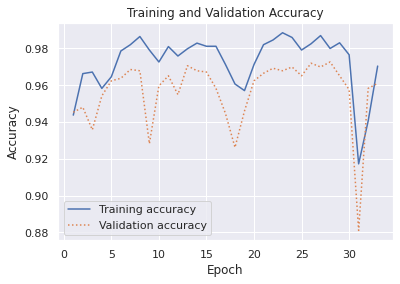

In [ ]:
sns.set()
acc = hist_es.history['accuracy']
val = hist_es.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.plot()

[]

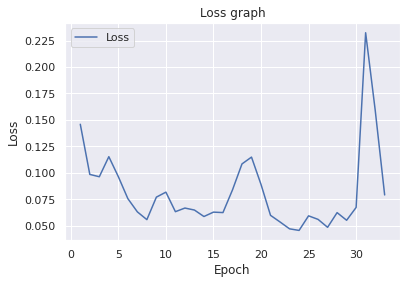

In [ ]:
loss = hist_es.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, '-', label='Loss')
plt.title('Loss graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.plot()

In [ ]:
model.evaluate(X_test, y_test)

46/46 [==============================] - 0s 945us/step - loss: 0.4648 - accuracy: 0.8988


[0.46476250886917114, 0.8988379836082458]

# **Reducing the number of layers**

In [ ]:
model1 = Sequential()
model1.add(Dense(32, activation='relu', input_dim=72))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                2336      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=128, callbacks=[callback] )

Epoch 1/150
46/46 [==============================] - 1s 8ms/step - loss: 0.8808 - accuracy: 0.5266 - val_loss: 0.7221 - val_accuracy: 0.5420
Epoch 2/150
46/46 [==============================] - 0s 3ms/step - loss: 0.7100 - accuracy: 0.5401 - val_loss: 0.6914 - val_accuracy: 0.5653
Epoch 3/150
46/46 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5538 - val_loss: 0.6753 - val_accuracy: 0.5871
Epoch 4/150
46/46 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5695 - val_loss: 0.6664 - val_accuracy: 0.5803
Epoch 5/150
46/46 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.5709 - val_loss: 0.6635 - val_accuracy: 0.5947
Epoch 6/150
46/46 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.5845 - val_loss: 0.6636 - val_accuracy: 0.5666
Epoch 7/150
46/46 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.5813 - val_loss: 0.6578 - val_accuracy: 0.5981
Epoch 8/150
4

[]

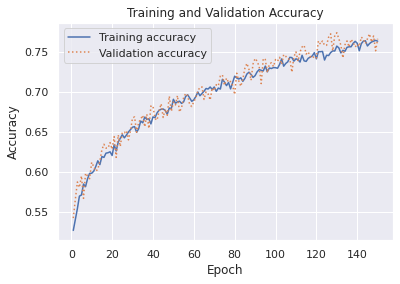

In [ ]:
sns.set()
acc = hist1.history['accuracy']
val = hist1.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.plot()

In [ ]:
model1.evaluate(X_test, y_test)

46/46 [==============================] - 0s 915us/step - loss: 0.5267 - accuracy: 0.7068


[0.5266716480255127, 0.7067669034004211]

[]

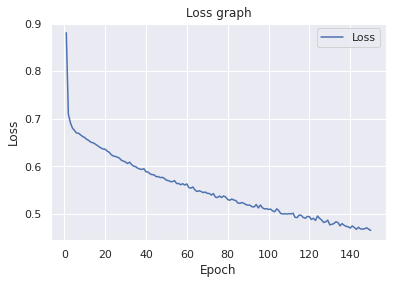

In [ ]:
loss = hist1.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, '-', label='Loss')
plt.title('Loss graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.plot()

In [ ]:
model1.save("ModelRedLayers")

# **Dropout Layers**

In [ ]:
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_dim=72))
model2.add(Dropout(0.4))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                4672      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_24 (Dense)            (None, 32)               

In [ ]:
hist2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=128, callbacks=[callback] )

Epoch 1/200
46/46 [==============================] - 1s 6ms/step - loss: 1.3609 - accuracy: 0.5047 - val_loss: 0.6965 - val_accuracy: 0.5079
Epoch 2/200
46/46 [==============================] - 0s 3ms/step - loss: 0.8038 - accuracy: 0.5018 - val_loss: 0.6914 - val_accuracy: 0.5243
Epoch 3/200
46/46 [==============================] - 0s 3ms/step - loss: 0.7439 - accuracy: 0.4994 - val_loss: 0.6918 - val_accuracy: 0.5208
Epoch 4/200
46/46 [==============================] - 0s 3ms/step - loss: 0.7293 - accuracy: 0.4991 - val_loss: 0.6926 - val_accuracy: 0.5065
Epoch 5/200
46/46 [==============================] - 0s 3ms/step - loss: 0.7154 - accuracy: 0.5023 - val_loss: 0.6925 - val_accuracy: 0.4997
Epoch 6/200
46/46 [==============================] - 0s 2ms/step - loss: 0.7091 - accuracy: 0.5054 - val_loss: 0.6925 - val_accuracy: 0.5010
Epoch 7/200
46/46 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.5038 - val_loss: 0.6930 - val_accuracy: 0.5031
Epoch 8/200
4

[]

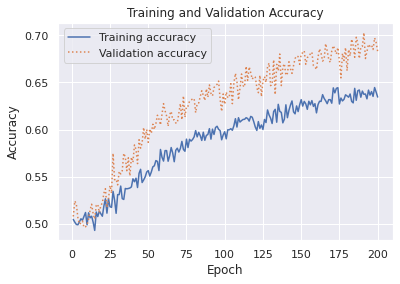

In [ ]:
sns.set()
acc = hist2.history['accuracy']
val = hist2.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.plot()

[]

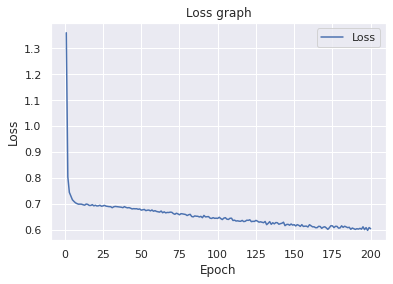

In [ ]:
loss = hist2.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, '-', label='Loss')
plt.title('Loss graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.plot()

In [ ]:
model2.evaluate(X_test, y_test)

46/46 [==============================] - 0s 884us/step - loss: 0.6161 - accuracy: 0.6480


[0.6161163449287415, 0.6479836106300354]

### **Recursive Feature Elimination** [Scikit](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

clf = LinearSVC(C=0.01, penalty="l1", dual=False)
clf.fit(X_train, y_train)

rfe_selector = RFE(clf)
rfe_selector = rfe_selector.fit(X_train, y_train)

rfe_values = rfe_selector.get_support()

In [ ]:
rfe_selector.support_

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False,  True, False,  True,  True,  True,  True])

In [ ]:
rfe_indexes = np.where(rfe_values)[0]

In [ ]:
rfe_indexes, len(rfe_indexes)

(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 24, 25, 26, 33, 34,
        35, 42, 43, 44, 45, 46, 47, 48, 51, 53, 59, 60, 61, 62, 66, 68, 69,
        70, 71]), 36)

In [ ]:
df.head()

In [ ]:
df1 = df.copy()
df1.drop(df1.columns[rfe_indexes], axis=1, inplace=True)
df1.head()

In [ ]:
df1 = shuffle(df1)
y1 = df1['label']
X1 = df1.drop(labels=['label'], axis =1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
model3 = Sequential()
model3.add(Dense(64, activation='relu', input_dim=36))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 64)                2368      
                                                                 
 dense_47 (Dense)            (None, 64)                4160      
                                                                 
 dense_48 (Dense)            (None, 32)                2080      
                                                                 
 dense_49 (Dense)            (None, 32)                1056      
                                                                 
 dense_50 (Dense)            (None, 1)                 33        
                                                                 
Total params: 9,697
Trainable params: 9,697
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist3 = model3.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=150, batch_size=128, callbacks=[callback] )

Epoch 1/150
35/35 [==============================] - 1s 6ms/step - loss: 0.7103 - accuracy: 0.5221 - val_loss: 0.6885 - val_accuracy: 0.5332
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5408 - val_loss: 0.6883 - val_accuracy: 0.5325
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5331 - val_loss: 0.7034 - val_accuracy: 0.5325
Epoch 4/150
35/35 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5422 - val_loss: 0.6846 - val_accuracy: 0.5427
Epoch 5/150
35/35 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5449 - val_loss: 0.6879 - val_accuracy: 0.5311
Epoch 6/150
35/35 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5588 - val_loss: 0.6784 - val_accuracy: 0.5516
Epoch 7/150
35/35 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5561 - val_loss: 0.6834 - val_accuracy: 0.5543
Epoch 8/150
3

[]

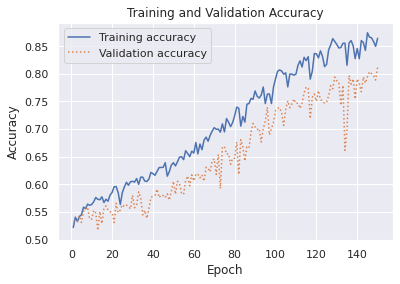

In [ ]:
sns.set()
acc = hist3.history['accuracy']
val = hist3.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.plot()

[]

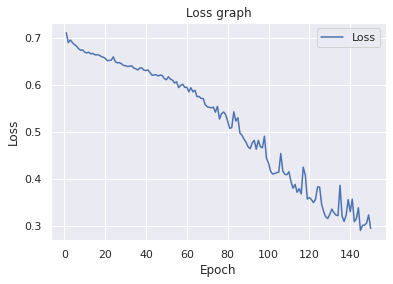

In [ ]:
loss = hist3.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, '-', label='Loss')
plt.title('Loss graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.plot()

In [ ]:
model3.evaluate(X1_test, y1_test)

46/46 [==============================] - 0s 955us/step - loss: 0.4340 - accuracy: 0.8072


[0.433998167514801, 0.8072453737258911]

# **Regularization**

In [ ]:
from keras.regularizers import l2

In [ ]:
reg = l2(0.003) # 0.003, 0.001, 0.0003

In [ ]:
model4 = Sequential()
model4.add(Dense(64, activation='relu', input_dim=36, activity_regularizer=reg))
model4.add(Dense(64, activation='relu',activity_regularizer=reg))
model4.add(Dense(32, activation='relu',activity_regularizer=reg))
model4.add(Dense(32, activation='relu',activity_regularizer=reg))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 64)                2368      
                                                                 
 dense_52 (Dense)            (None, 64)                4160      
                                                                 
 dense_53 (Dense)            (None, 32)                2080      
                                                                 
 dense_54 (Dense)            (None, 32)                1056      
                                                                 
 dense_55 (Dense)            (None, 1)                 33        
                                                                 
Total params: 9,697
Trainable params: 9,697
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist4 = model4.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=100, batch_size=128, callbacks=[callback] )

Epoch 1/100
35/35 [==============================] - 1s 7ms/step - loss: 2.8919 - accuracy: 0.4979 - val_loss: 1.9376 - val_accuracy: 0.5113
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 1.5866 - accuracy: 0.5276 - val_loss: 1.3360 - val_accuracy: 0.5215
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 1.1660 - accuracy: 0.5326 - val_loss: 1.0437 - val_accuracy: 0.5277
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.9514 - accuracy: 0.5477 - val_loss: 0.8905 - val_accuracy: 0.5345
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.8380 - accuracy: 0.5568 - val_loss: 0.8095 - val_accuracy: 0.5427
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.7775 - accuracy: 0.5586 - val_loss: 0.7651 - val_accuracy: 0.5325
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.7450 - accuracy: 0.5518 - val_loss: 0.7401 - val_accuracy: 0.5448
Epoch 8/100
3

[]

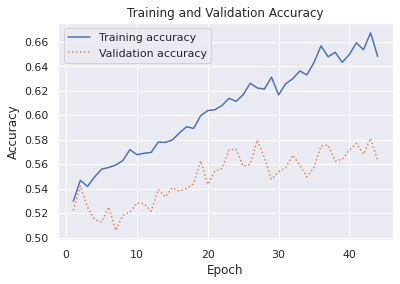

In [ ]:
sns.set()
acc = hist4.history['accuracy']
val = hist4.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.plot()

[]

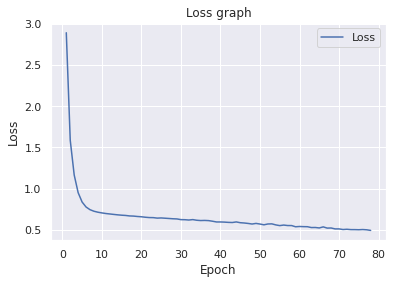

In [ ]:
loss = hist4.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, '-', label='Loss')
plt.title('Loss graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.plot()

In [ ]:
model4.evaluate(X1_test, y1_test)

46/46 [==============================] - 0s 992us/step - loss: 0.7528 - accuracy: 0.6398


[0.7528250813484192, 0.6397812962532043]

In [ ]:
#@title read, crop (5m valid samples interval) and filter (high & lowpass) data files
import mne
import pandas as pd
import numpy as np

scenarios = ["idle", "nback", "driving", "driving_and_nback"]
subjects = ["Donald", "Ganavi", "Nicolas"]
sessions = [1, 2, 3]
colors_matte = ["navy", "darkgreen", "maroon", "orange"] 
colors = ["blue", "green", "red", "yellow"]
markers = ["v", "^", "<", 4]

# automatically crop a subject's recording data according to it's events
def crop_recording_data(filename, subject_data):
    # extract events
    events = [el["list"] for el in subject_data.info["events"]]
    # extract last valid recorded sample
    last_sample = events[-2][0]
    # discard exit event and last valid recording event
    events = events[:-2]
    # reverse order of events
    events = events[::-1]
    # determine valid sample interval
    curent_sample = 0
    for event in events:
        # calculate elapsed time
        current_sample = event[0]
        tmp = last_sample - current_sample
        minutes = tmp/250/60
        if (minutes >= 4.8) and (minutes <= 5.22):
            print("Info for:", filename,
                  "first valid sample:", current_sample,
                  "last valid sample:", last_sample,
                  "minutes:", minutes)
            # point of cropping has to be minutes
            return subject_data.crop(tmin=current_sample/250, tmax=last_sample/250, verbose=False)


def trim_and_standardize_data(data):
    trim_std_data = []
    for channel in data:
        p1, p99 = np.percentile(channel, [1, 99])
        # replace extreme values with the appropriate percentiles
        channel[channel < p1] = p1
        channel[channel > p99] = p99
        # standardize data
        channel = (channel-channel.mean())/channel.std()
        trim_std_data.append(channel)
    return np.array(trim_std_data)

data_dict = {}
filtered_data_dict = {}
channel_names = mne.io.read_raw_fif("./s3_idle_Donald.fif", preload=True, verbose="Error").pick("eeg").ch_names

# constrct filtered data dict for plotting purposes and unfiltered for further processing
# (since filtering removes information that is beneficial for classification)
for session in sessions:
    # save data for one session across all scenarios and subjects
    session_dict = {}
    filtered_session_dict = {}
    for scenario in scenarios:
        # save data for one scenario across all subjects
        subject_data_array = []
        filtered_subject_data_array = []
        for subject in subjects:
            # construct filename
            filename = "s"+str(session)+"_"+scenario+"_"+subject+".fif"
            # read subject data
            data = mne.io.read_raw_fif(filename, preload=True, verbose="Error").pick("eeg")
            # crop subject data
            cropped_data = crop_recording_data(filename, data)
            # filter cropped subject data
            filtered_data = cropped_data.copy().filter(l_freq=0.1, h_freq=49.9, picks="all", method="fir",
                                                fir_window="hamming", fir_design='firwin', verbose=False)
            # trim and standardize unfiltered data
            unfiltered = trim_and_standardize_data(cropped_data.get_data())
            # trim and standardize filtered data
            filtered = trim_and_standardize_data(filtered_data.get_data())
            # append subject data for one scenario
            subject_data_array.append(unfiltered)
            filtered_subject_data_array.append(filtered)
        # fill dict, mapping scenario to all subjects' data
        session_dict.update({scenario:subject_data_array})
        filtered_session_dict.update({scenario:filtered_subject_data_array})
    # fill dict, mapping session number to all scenarios
    data_dict.update({session:session_dict})
    filtered_data_dict.update({session:filtered_session_dict})

Info for: s1_idle_Donald.fif first valid sample: 9529 last valid sample: 84799 minutes: 5.018
Info for: s1_idle_Ganavi.fif first valid sample: 9469 last valid sample: 85559 minutes: 5.072666666666667
Info for: s1_idle_Nicolas.fif first valid sample: 10259 last valid sample: 86239 minutes: 5.065333333333333
Info for: s1_nback_Donald.fif first valid sample: 6839 last valid sample: 82289 minutes: 5.03
Info for: s1_nback_Ganavi.fif first valid sample: 164019 last valid sample: 240479 minutes: 5.097333333333333
Info for: s1_nback_Nicolas.fif first valid sample: 234509 last valid sample: 310599 minutes: 5.072666666666667
Info for: s1_driving_Donald.fif first valid sample: 265529 last valid sample: 342809 minutes: 5.152
Info for: s1_driving_Ganavi.fif first valid sample: 11649 last valid sample: 87879 minutes: 5.082
Info for: s1_driving_Nicolas.fif first valid sample: 43759 last valid sample: 119309 minutes: 5.036666666666666
Info for: s1_driving_and_nback_Donald.fif first valid sample: 4359 

# **IntraSubject Model**

In [ ]:
donald_scenario ={
    "idle": [idle_donald.get_data(), idle_donald2.get_data(), idle_donald3.get_data()],
    "nback": [nback_donald.get_data(), nback_donald2.get_data(), nback_donald3.get_data()],
    "driving": [driving_donald.get_data(),driving_donald2.get_data(), driving_donald3.get_data()],
    "driving_and_nback": [driving_and_nback_donald.get_data(), driving_and_nback_donald2.get_data(), driving_and_nback_donald3.get_data()]
}
std_scenario_donald  = standardize_data(donald_scenario)
scenarios_mne_donald = merge_data(std_scenario_donald)
scenarios_psd_donald = compute_psd(scenarios_mne_donald)

scenario_features_donald = remove_nan(scenarios_psd_donald)

driving_df = pd.DataFrame(data=scenario_features_donald["driving"])
driving_and_nback_df = pd.DataFrame(data=scenario_features_donald["driving_and_nback"])

#  binary setting
X_donald = pd.concat([driving_df, driving_and_nback_df])
print("X_donald.shape: ", X_donald.shape)

driving_labels = np.zeros(len(driving_df), dtype=np.int8)
driving_and_nback_labels = np.ones(len(driving_and_nback_df), dtype=np.int8)

y_donald = np.concatenate((driving_labels, driving_and_nback_labels),
                                axis=0,
                                dtype=np.int8)
print("y_donald.shape:", y_donald.shape)
df_donald = X_donald.copy(deep= True)
df_donald['label'] = y_donald
df_donald = shuffle(df_donald)
# print(df_donald.head())

yd = df_donald['label']
Xd = df_donald.drop(labels=['label'], axis =1)

from sklearn.model_selection import train_test_split
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size = 0.1, random_state = 0)
Xd_train, Xd_val, yd_train, yd_val = train_test_split(Xd, yd, test_size = 0.1, random_state = 0)

Creating RawArray with float64 data, n_channels=8, n_times=225173
    Range : 0 ... 225172 =      0.000 ...   900.688 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=233302
    Range : 0 ... 233301 =      0.000 ...   933.204 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=371372
    Range : 0 ... 371371 =      0.000 ...  1485.484 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=240762
    Range : 0 ... 240761 =      0.000 ...   963.044 secs
Ready.
idle time in minutes:  15.011533333333334
nback time in minutes:  15.553466666666667
driving time in minutes:  24.758133333333333
driving_and_nback time in minutes:  16.0508
Effective window size : 1.000 (s)
idle shape:  (8, 51, 1800)
Effective window size : 1.000 (s)
nback shape:  (8, 51, 1865)
Effective window size : 1.000 (s)
driving shape:  (8, 51, 2969)
Effective window size : 1.000 (s)
driving_and_nback shape:  (8, 51, 1925)
X_donald.shape:  (4894, 72)
y_donald.shape: (

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
modeld = Sequential()
modeld.add(Dense(32, activation='relu', input_dim=72))
modeld.add(Dense(16, activation='relu'))
modeld.add(Dense(1, activation='sigmoid'))
modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modeld.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                2336      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
histd = modeld.fit(Xd_train, yd_train, validation_data=(Xd_val, yd_val), epochs=150, batch_size=32)
# callbacks=[callback]

Epoch 1/150
138/138 [==============================] - 1s 4ms/step - loss: 0.9820 - accuracy: 0.5697 - val_loss: 0.6613 - val_accuracy: 0.5755
Epoch 2/150
138/138 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.5677 - val_loss: 0.6373 - val_accuracy: 0.6327
Epoch 3/150
138/138 [==============================] - 0s 2ms/step - loss: 0.6191 - accuracy: 0.5854 - val_loss: 0.6280 - val_accuracy: 0.6204
Epoch 4/150
138/138 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.6090 - val_loss: 0.6211 - val_accuracy: 0.6163
Epoch 5/150
138/138 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.6242 - val_loss: 0.6205 - val_accuracy: 0.6429
Epoch 6/150
138/138 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.6365 - val_loss: 0.6155 - val_accuracy: 0.6122
Epoch 7/150
138/138 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.6417 - val_loss: 0.6137 - val_accuracy: 0.6224

[]

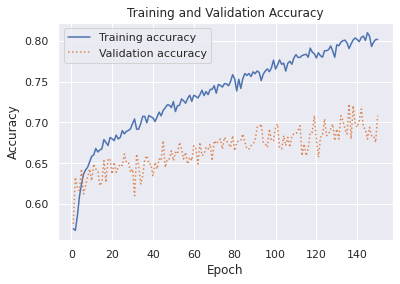

In [ ]:
sns.set()
acc = histd.history['accuracy']
val = histd.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.plot()

[]

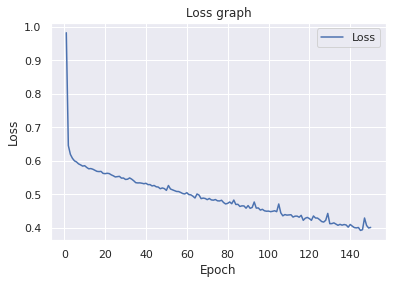

In [ ]:
loss = histd.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, '-', label='Loss')
plt.title('Loss graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.plot()

In [ ]:
modeld.evaluate(Xd_test, yd_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.7082


[0.7036080360412598, 0.7081632614135742]

In [ ]:
%cd /content/gdrive/My Drive/Colab Notebooks/BCI
modeld.save("donald_model")

/content/gdrive/My Drive/Colab Notebooks/BCI
